# 0. 패키지 불러오기

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

- 분석의 목적
    - 신규자격/자격유지 검사 테스트 결과를 토대로 교통사고 위험군이 될 사람을 에측하는 AI모델 제작

# 1. 데이터 불러오기

## 가. EDA
- A(신규자격)
    - 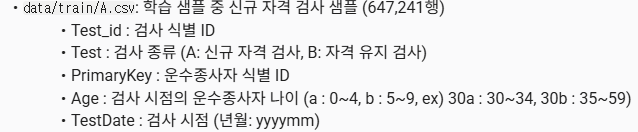
- B(자격유지)
    - 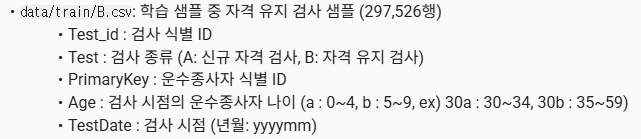

### 1) A검사(신규자격)
- 각 테스트 항목(A1, A2 등)마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- A1 ~ A7 측정항목 : 각 측정별 세부 측정항목이 있지만 대부분 조건등이 기록된 것이고, 실제 평가기준에 의거한 항목을 학습에 사용(ex : A1검사는 A1-3만 사용)
    - A1-3, A2-3, A3-5, A3-7, A4-3, A4-5, A5-2, A6-1, A7-1
- A8, A9 측정항목 : 정성적인 응답에 대한 정답 트리거 갯수 합산 또는 점수 계산으로 판단, 그대로 사용
    - A8-1 ~ 2, A9-1 ~ 5

In [8]:
# A(신규자격) Train 데이터 확인
train_root_dir = './data/train'
train_a_df = pd.read_csv(os.path.join(train_root_dir, 'A.csv'))

In [9]:
train_a_df

,Test_id,Test,PrimaryKey,Age,TestDate,A1-1,A1-2,A1-3,A1-4,A2-1,...,A5-3,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"2,2,1,1,1,2,1,1,2,2,1,2,2,2,2,1,1,1","2,1,2,2,1,2,2,3,1,1,1,3,3,3,2,3,1,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-32,42,10,-6,-11,-20,-80,-54,16,-4,14,33,50,8,...","0,0,2,3,3,3,2,1,2,2,1,2,1,3,3,3,2,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,1,1,2,1,2,2,2,1,1,1,2,2,1,2,2,1,2","2,1,3,2,3,2,1,3,1,1,2,1,2,3,3,3,2,1","1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","636,9,-3,-26,-3,-21,29,0,14,39,44,29,81,22,0,-...","0,0,2,2,1,3,3,2,2,3,1,1,1,3,2,2,3,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"1,2,1,1,2,1,1,1,2,1,2,2,1,2,1,2,2,2","3,1,2,2,3,3,1,1,3,3,2,1,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","13,-34,4,-23,-25,-54,14,-37,-102,-79,-60,3,-11...","0,0,2,2,1,1,3,1,1,3,1,3,3,2,3,2,3,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"2,2,2,2,2,1,1,1,1,1,2,1,2,1,1,2,1,2","1,1,3,2,3,3,1,3,1,2,2,3,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-25,-8,102,13,0,-54,-49,-62,13,-57,-26,-54,-89...","0,2,2,1,3,3,1,1,3,3,3,2,2,3,1,2,1,3",...,"1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"2,1,2,2,2,2,1,1,1,2,2,1,1,1,1,2,1,2","2,1,2,2,3,1,2,3,3,1,1,2,2,1,1,3,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-9,-37,-55,-3,-25,-21,-6,48,56,16,-47,-12,50,3...","0,0,2,1,2,2,3,3,1,3,2,1,3,2,2,1,3,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11,15,3,0,6,18,7,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647236,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,40a,202212,"1,2,2,2,1,1,1,1,2,2,1,1,1,1,2,2,2,2","3,1,2,3,3,2,2,1,1,2,2,1,1,3,3,1,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-3,-34,-9,8,22,-29,-23,1,4,30,-23,39,26,-80,-5...","0,0,1,2,1,1,2,3,3,2,3,3,1,1,2,1,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,16,1,1,9,12,3,7,5
647237,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,30b,202212,"1,1,1,2,1,2,2,2,1,1,2,1,2,1,2,1,2,2","1,3,1,3,3,2,2,1,1,3,3,2,1,2,1,2,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","9,22,1,-25,56,-26,-9,-47,26,-3,0,-29,-34,21,-2...","0,1,2,3,2,2,2,3,1,3,3,3,3,2,1,2,1,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...",14,15,6,0,4,9,0,8,5
647238,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,30b,202212,"1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1","2,1,3,2,1,3,3,1,1,2,2,3,2,3,3,1,1,2","0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1","-52,-37,722,-3,-60,-77,0,594,594,638,638,5,-63...","0,2,1,1,2,2,1,3,3,3,3,2,1,1,3,2,2,2",...,"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,18,0,0,0,0,0,0,0
647239,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,40a,202212,"2,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1","1,1,2,3,3,2,2,2,1,3,3,2,1,2,1,1,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-42,18,-23,-54,-42,-23,-3,-21,18,-28,-68,27,18...","0,1,3,1,3,3,1,1,2,2,3,2,3,1,2,3,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,9,7,0,4,9,0,6,3


In [10]:
train_a_df.info()
# 데이터 647241개 중 일부 시험항목에 null값이 1개씩 없는것으로 확인
# 추후 처리 : 데이터의 수가 많아서 일괄 삭제해도 분석결과에 크게 영향 없을것으로 판단(but, 시간여유가 되면 대체방안에 대해서도 생각)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647241 non-null  object
 1   Test        647241 non-null  object
 2   PrimaryKey  647241 non-null  object
 3   Age         647241 non-null  object
 4   TestDate    647241 non-null  int64 
 5   A1-1        647241 non-null  object
 6   A1-2        647241 non-null  object
 7   A1-3        647241 non-null  object
 8   A1-4        647241 non-null  object
 9   A2-1        647241 non-null  object
 10  A2-2        647241 non-null  object
 11  A2-3        647241 non-null  object
 12  A2-4        647240 non-null  object
 13  A3-1        647240 non-null  object
 14  A3-2        647240 non-null  object
 15  A3-3        647240 non-null  object
 16  A3-4        647240 non-null  object
 17  A3-5        647240 non-null  object
 18  A3-6        647241 non-null  object
 19  A3-7        647240 non-

In [11]:
train_a_df.loc[train_a_df['A2-4'].isnull()==True,'A2-4']

426168    NaN
Name: A2-4, dtype: object

In [12]:
# train_a_df.iloc[426168]
print(train_a_df.iloc[426168,5:])
print("-"*100)
print(train_a_df.iloc[426168,5:].apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0))
# 각 시험항목별 데이터의 갯수는 각 시험측정에 필요한 지정되니 측정횟수(ex : a1시험 : 총 18회 측정)
# 일부 측정항목에서 null값이 1개씩 존재하는 것으로 확인

A1-1                  1,2,1,2,2,1,2,1,2,2,1,1,1,1,2,2,1,2
A1-2                  3,2,3,2,1,2,2,1,1,3,1,3,1,2,1,3,2,3
A1-3                  0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1-4    14,-61,-54,638,-94,-29,-26,-50,-102,0,-118,-3,...
A2-1                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-2                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-3                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-4                                                  NaN
A3-1    1,2,2,2,1,2,2,2,1,2,1,2,2,1,1,2,2,2,1,1,1,1,1,...
A3-2    8,5,3,7,6,1,3,3,8,1,2,7,5,6,8,7,7,5,4,2,4,4,8,...
A3-3    2,2,2,1,2,2,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,...
A3-4    8,5,3,7,6,1,3,2,8,1,4,7,5,7,8,7,2,4,4,7,4,4,8,...
A3-5    1,1,1,1,1,1,1,3,1,1,3,1,1,3,1,1,3,3,1,3,1,1,1,...
A3-6    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
A3-7    1250,2135,1167,733,1518,2402,1668,1368,1818,20...
A4-1    2,2,2,2,2,1,2,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,2,...
A4-2    2,1,1,1,2,1,2,1,1,2,2,1,1,2,1,1,1,2,1,1,1,2,1,...
A4-3    1,1,1,

In [13]:
print(train_a_df['A1-3'])
print("-"*100)
print(train_a_df['A2-3'])

0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647238    0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1
647239    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647240    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Name: A1-3, Length: 647241, dtype: object
----------------------------------------------------------------------------------------------------
0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0

In [14]:
print(train_a_df['A8-1'])
print("-"*100)
print(train_a_df['A9-1'])

0         6
1         8
2         0
3         7
4         3
         ..
647236    1
647237    6
647238    0
647239    7
647240    6
Name: A8-1, Length: 647241, dtype: int64
----------------------------------------------------------------------------------------------------
0          4
1          9
2          6
3         21
4          6
          ..
647236     9
647237     4
647238     0
647239     4
647240     6
Name: A9-1, Length: 647241, dtype: int64


### 2) B검사(자격유지) 
- A검사와 마찬가지로 각 테스트 항목마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- B1, B2 측정 : 정/오 응답 갯수 사용(B1-1, B1-3, B2-1, B2-3)
- B3 측정 : B3-1(정답갯수), B3-2(반응시간 평균)
- B4 측정 : B4-1(정답갯수) 
- B5 ~ B8 측정 : 정/오 정답만(B5-1, B6, B7, B8)
- B9, B10 측정 : '7'에 버튼을 누른 횟수와 장애물에 부딪히지 않은 횟수, 색깔에 맞춰 동일한 색 버튼을 누른 횟수 등 정답에 초점을 둘지 오답에 초점을 둘지 생각해볼 문제


In [15]:
# B(자격유지) Train 데이터 확인
train_root_dir = './data/train'
train_b_df = pd.read_csv(os.path.join(train_root_dir, 'B.csv'))

In [16]:
train_b_df

,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,B2-1,B2-2,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.03798499,0,0.5811322,0,0,0.5803714,1.00910...","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","0.8907053,0,0,0,0,1.040678,0.6199818,0,0,0.657...",...,0,0,35,1,20,0,3,57,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","0,0,0,0.1280282,0,0,0.9760087,0.03197882,0,0.0...","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,0,0,35,2,19,1,1,59,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","0.5967258,0,0,0,0,0,0.7050578,0.6730202,0,0.83...","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","0,0.7690769,0,0,0.7381148,0,0,0.9290089,0,0,0....",...,0,0,35,0,18,2,0,60,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0.6738921,0,0.5439928,0.5342392,0.424049...","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0.5470542,0,0,0,0,0.5041592,0.542075,0,0,0.740...",...,0,0,35,6,19,1,2,58,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.3119312,0,0.03894603,0,0,0.03889565,0.0389...","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4689675,0,0,0.03903218,0,0.7800297,0,0.54600...",...,0,1,34,0,20,0,0,60,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297521,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,B,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,70a,202212,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1","0.8006758,0,0,0,0.9175501,0,0.8008417,0,0.9509...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1","0.5337561,0,0.8006437,0,0.784023,0,0,0,0,0.800...",...,0,1,34,0,20,0,2,58,2,20
297522,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,B,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,70a,202212,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1","0,0.5005826,0,0.6004335,0,0,0.6506259,1.034011...","4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4673256,0,0.517314,0,0.5003029,0,0,0.5165698...",...,0,0,35,0,20,0,0,60,1,20
297523,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,B,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,60b,202212,"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1","0.7076792,0,0,0,0.9337709,0,0.9450536,0,1.0320...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.6149476,0,0.9309805,0,0.9395396,0,0,0.721625...",...,0,0,35,0,20,0,0,60,0,20
297524,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,B,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,60b,202212,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4","2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,13,1,34,4,0,20,0,60,0,19


In [17]:
train_b_df.info()
# 마찬가지로 전체 297526개 데이터 중 특정 시험에서 결측치 값이 보임
# A검사와 다르게 결측치 값이 1개 보다 더 많은 측정항목이 보여 전체적으로 어느정도 데이터가 부족한지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     297526 non-null  object
 1   Test        297526 non-null  object
 2   PrimaryKey  297526 non-null  object
 3   Age         297526 non-null  object
 4   TestDate    297526 non-null  int64 
 5   B1-1        297517 non-null  object
 6   B1-2        297517 non-null  object
 7   B1-3        297517 non-null  object
 8   B2-1        297523 non-null  object
 9   B2-2        297523 non-null  object
 10  B2-3        297523 non-null  object
 11  B3-1        297523 non-null  object
 12  B3-2        297523 non-null  object
 13  B4-1        297523 non-null  object
 14  B4-2        297523 non-null  object
 15  B5-1        297523 non-null  object
 16  B5-2        297523 non-null  object
 17  B6          297523 non-null  object
 18  B7          297524 non-null  object
 19  B8          297525 non-

In [18]:
train_b_test = train_b_df.T.iloc[5:,:]
train_b_test.apply(lambda row : row.isnull().sum(), axis = 1)
# 각 측정항목별 결측치 확인

B1-1     9
B1-2     9
B1-3     9
B2-1     3
B2-2     3
B2-3     3
B3-1     3
B3-2     3
B4-1     3
B4-2     3
B5-1     3
B5-2     3
B6       3
B7       2
B8       1
B9-1     0
B9-2     0
B9-3     0
B9-4     0
B9-5     0
B10-1    0
B10-2    0
B10-3    0
B10-4    0
B10-5    0
B10-6    0
dtype: int64

In [19]:
print(train_b_df['B1-1'][0])
print("-"*100)
print(train_b_df['B1-3'][0])

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
----------------------------------------------------------------------------------------------------
3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4


In [20]:
# B3는 반응시간도 중요함
print(train_b_df['B3-2'][0])
print("-"*100)
print(train_b_df['B4-1'][2], " / 갯수:", len(train_b_df['B4-1'][2]))

0.8169604,0.9480587,0.8458152,0.9181027,0.9304094,0.7811799,0.8138167,0.7461151,0.9210144,0.7461294,0.7942742,0.8164628,0.8533937,0.8852984,0.7833536
----------------------------------------------------------------------------------------------------
5,3,1,3,1,3,3,1,3,5,1,1,1,1,1,5,5,3,1,5,1,1,1,5,3,1,3,3,5,1,3,1,1,5,1,1,1,1,3,3,5,5,3,5,3,1,1,1,5,5,1,1,1,1,3,1,5,5,1,1  / 갯수: 119


In [21]:
# B4의 시도횟수는 60회인데 왜 119개의 데이터가 있을까? ','를 포함해서 119개였다. 실제로는 60개가 맞음
test_a = train_b_df['B4-1'][0]
print(len([i for i in test_a.split(',') if int(i) in(1, 2)]))
print([i for i in test_a.split(',') if int(i) in(1, 2)])
print("-"*100)
print(len([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)]))
print([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)])
print("-"*100)

30
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1']
----------------------------------------------------------------------------------------------------
30
['5', '5', '3', '3', '3', '3', '5', '5', '6', '5', '3', '3', '3', '5', '5', '3', '3', '3', '5', '5', '4', '5', '3', '3', '5', '5', '3', '6', '6', '3']
----------------------------------------------------------------------------------------------------


In [22]:
print(train_b_df['B9-1']) # aud, hit : 아마도 숫자 '7'이 15번 나오는 동안 제대로 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-2']) # aud, miss : 이거는 '7'들렸는데 못누른 횟수인 듯

0         15
1         15
2         15
3         15
4         15
          ..
297521    15
297522    15
297523    15
297524     2
297525    15
Name: B9-1, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0          0
1          0
2          0
3          0
4          0
          ..
297521     0
297522     0
297523     0
297524    13
297525     0
Name: B9-2, Length: 297526, dtype: int64


In [23]:
print(train_b_df['B9-3']) # aud, fa : 7이외 숫자에 대해 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-4']) # aud, cr : 7이외 숫자에 정확하게 안누른 횟수인듯

0         0
1         0
2         0
3         0
4         1
         ..
297521    1
297522    0
297523    0
297524    1
297525    0
Name: B9-3, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         35
1         35
2         35
3         35
4         34
          ..
297521    34
297522    35
297523    35
297524    34
297525    35
Name: B9-4, Length: 297526, dtype: int64


In [24]:
print(train_b_df['B9-5']) # vis, err : 장애물 피하지 못한 횟수
print("-"*100)
print(train_b_df['B10-6']) # B10 테스트 색깔에 맞추어 정확하게 누른 횟수

0         1
1         2
2         0
3         6
4         0
         ..
297521    0
297522    0
297523    0
297524    4
297525    2
Name: B9-5, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         15
1         19
2         19
3         20
4         20
          ..
297521    20
297522    20
297523    20
297524    19
297525    19
Name: B10-6, Length: 297526, dtype: int64


### 3) EDA를 위한 데이터 전처리

#### 가) A검사 전처리

In [25]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
sel_train_a_df = train_a_df[sel_column]
sel_train_a_df

,Test_id,Test,PrimaryKey,Age,TestDate,A1-3,A2-3,A3-6,A3-7,A4-3,...,A5-2,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","2218,1268,1517,1201,967,1869,1684,2135,1368,16...","1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,1,1,2,1,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","583,650,600,534,1468,700,1201,600,650,633,600,...","1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","583,534,583,600,533,583,650,884,650,951,633,12...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,2,2,2,1,1,1,1,1,2,1,1,2,2,2,1,1,1,1,2,1,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1768,1785,1818,1468,1051,1668,851,2235,1468,11...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"2,2,1,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","2252,1368,800,1417,1117,900,851,1050,1117,851,...","1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,2,1,2,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,...",11,15,3,0,6,18,7,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647236,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,40a,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1451,1101,600,1368,700,683,700,967,1568,600,11...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,...",13,16,1,1,9,12,3,7,5
647237,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,30b,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","533,1518,650,583,650,583,600,1051,1418,600,600...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,...",14,15,6,0,4,9,0,8,5
647238,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,30b,202212,"0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","684,1618,600,601,634,600,1317,1417,700,584,850...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,...",13,18,0,0,0,0,0,0,0
647239,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,40a,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","617,1051,750,817,583,767,583,550,600,550,550,5...","1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,2,1,2,1,1,1,1,1,2,1,2,1,2,1,1

In [26]:
# 결측치 처리 (1) 단순 삭제
sel_train_a_df = sel_train_a_df.dropna()

In [27]:
# A1-3 : '1' COUNT / 1 : 유효범위 초과
sel_train_a_df['A1-3'] = sel_train_a_df['A1-3'].apply(lambda x : x.split(',').count('1'))

# A2-3 : '1' COUNT / 1 : 유효범위 초과
sel_train_a_df['A2-3'] = sel_train_a_df['A2-3'].apply(lambda x : x.split(',').count('1'))

# A3-6 : '1' COUNT / 1 : 오반응
# sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1')).unique()
sel_train_a_df['A3-6'] = sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1'))

# A3-7 : 반응시간 평균(ms 단위)
sel_train_a_df['A3-7'] = sel_train_a_df['A3-7'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# A4-3 : '2' COUNT / 2 : 오답
sel_train_a_df['A4-3'] = sel_train_a_df['A4-3'].apply(lambda x : x.split(',').count('2'))

# A4-5 : 반응시간 평균(ms 단위)
sel_train_a_df['A4-5'] = sel_train_a_df['A4-5'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# A5-2 : '2' COUNT / 2 : 오답
sel_train_a_df['A5-2'] = sel_train_a_df['A5-2'].apply(lambda x : x.split(',').count('2'))


C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3610320584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['A1-3'] = sel_train_a_df['A1-3'].apply(lambda x : x.split(',').count('1'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3610320584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_a_df['A2-3'] = sel_train_a_df['A2-3'].apply(lambda x : x.split(',').count('1'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3610320584.py:9: SettingWithCopyWarning: 
A value is try

### 나) B검사 전처리

In [28]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 
              'B5-1', 'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
sel_train_b_df = train_b_df[sel_column]
sel_train_b_df

,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-3,B2-1,B2-3,B3-1,...,B6,B7,B8,B9-2,B9-3,B9-5,B10-2,B10-3,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","1,4,4,4,4,1,1,3,4,1,3,1,1,4,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","1,1,1,1,1,2,1,1,1,1,1,1,1,2,2","1,1,1,1,1,1,1,1,1,1,2,1",0,0,1,0,3,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","2,3,4,4,4,2,2,4,4,2,4,2,2,4,2,2","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"2,2,1,1,2,2,2,2,2,2,2,2,2,2,2","2,2,2,1,1,1,1,1,1,2,1,1,2,1,1","1,1,1,1,1,1,1,1,1,1,1,1",0,0,2,1,1,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","4,1,2,3,1,4,3,1,3,4,1,1,1,3,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"2,1,1,1,1,2,2,1,1,1,1,1,1,1,1","2,1,2,1,1,1,1,2,1,2,1,1,1,2,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,0,2,0,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","1,4,4,4,4,1,1,4,4,1,4,1,1,4,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2,1,1,1,1,1,1,1,1,1,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,6,1,2,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,4,1,4,1,4,1,1,4,4,4,1,4,2,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,1,0,0,0,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297521,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,B,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,70a,202212,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1","1,4,1,4,1,4,4,2,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,2,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,1,1,1",0,1,0,0,2,2,20
297522,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,B,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,70a,202212,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1","4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,1,4,1,4,4,1,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,2,1",0,0,0,0,0,1,20
297523,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,B,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,60b,202212,"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,1,4,1,4,4,1,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,1,1,1,1,1,1,1,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,0,0,0,0,20
297524,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,B,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,60b,202212,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4","2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1","2,4,2,4,2,4,4,2,4,2,2,4,2,2,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2,1,2,2,1,1,1,2,1,2,1,1,2,1,2","1,1,1,1,1,1,1,1,1,1,1,1",13,1,4,20,0,0,19


In [29]:
# 결측치 처리 (1) 단순 삭제
sel_train_b_df = sel_train_b_df.dropna()

In [30]:
# B1-1 : '2' COUNT / 2 : 오답
sel_train_b_df['B1-1'] = sel_train_b_df['B1-1'].apply(lambda x : x.split(',').count('2'))

# B1-3 : '2, 4' COUNT / 2, 4 : 오답
sel_train_b_df['B1-3'] = sel_train_b_df['B1-3'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4)]))

# B2-1, B2-3 : 오답만 COUNT
sel_train_b_df['B2-1'] = sel_train_b_df['B2-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B2-3'] = sel_train_b_df['B2-3'].apply(lambda x : len([i for i in x.split(',') if int(i) in (2, 4)]))

# B3-1 : '2' 오답 COUNT / B3-2 : 반응시간 평균(s 단위)
sel_train_b_df['B3-1'] = sel_train_b_df['B3-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B3-2'] = sel_train_b_df['B3-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B4-1 : '2, 4, 6' 오답 COUNT / B4-2 : 반응시간 평균(s 단위)
sel_train_b_df['B4-1'] = sel_train_b_df['B4-1'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4, 6)]))
sel_train_b_df['B4-2'] = sel_train_b_df['B4-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B5-1 : '2' 오답 COUNT  / B5-2 : 반응시간 평균(s 단위)
sel_train_b_df['B5-1'] = sel_train_b_df['B5-1'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B5-2'] = sel_train_b_df['B5-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# B6, B7, B8 : '2' 오답 COUNT
sel_train_b_df['B6'] = sel_train_b_df['B6'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B7'] = sel_train_b_df['B7'].apply(lambda x : x.split(',').count('2'))
sel_train_b_df['B8'] = sel_train_b_df['B8'].apply(lambda x : x.split(',').count('2'))

# B10-6 : 20 - 정확히 누른 횟수
sel_train_b_df['B10-6'] = sel_train_b_df['B10-6'].apply(lambda x : 20 - int(x))



C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3504036959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_b_df['B1-1'] = sel_train_b_df['B1-1'].apply(lambda x : x.split(',').count('2'))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3504036959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_train_b_df['B1-3'] = sel_train_b_df['B1-3'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4)]))
C:\Users\cvcv6\AppData\Local\Temp\ipykernel_13216\3504036959.py:8: Setting

###

### 다) 데이터 병합

In [31]:
data_root_dir = './data'
train_result_df = pd.read_csv(os.path.join(data_root_dir, 'train.csv'))
train_result_df

,Test_id,Test,Label
0,0x076D852AF20AB9E7E4A431D06232D2BA7C86AEF0BABE...,A,0
1,0x5BA583BBCA47CB12294853D9E451FF0C47E2A385F3A5...,A,0
2,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,B,0
3,0x0882E1EDC5FBE432B03885ED2562DA8F1FBE5F95CF0C...,A,0
4,0xDACD4BED2550522348833AC5CAB62F59365BBE3D6A60...,A,0
...,...,...,...
944762,0xADEE6DF23865E4CE36ABE36D598FFE05611E4E724813...,A,0
944763,0x1AF92248C0BA75AC470F310E121176FFF44A244C6A6D...,A,0
944764,0x21692C1672C480668D8745AEC8BA406B2C34F49E7E17...,A,0
944765,0xD597A69B0E24F2840998C22A58C6B3D274E5332AEB95...,A,0


In [32]:
train_a_set = pd.merge(sel_train_a_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')
train_b_set = pd.merge(sel_train_b_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')


### 라) EDA

#### (1) A자격검사

In [33]:
train_a_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647238 entries, 0 to 647237
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Test_id     647238 non-null  object 
 1   Test        647238 non-null  object 
 2   PrimaryKey  647238 non-null  object 
 3   Age         647238 non-null  object 
 4   TestDate    647238 non-null  int64  
 5   A1-3        647238 non-null  int64  
 6   A2-3        647238 non-null  int64  
 7   A3-6        647238 non-null  int64  
 8   A3-7        647238 non-null  float64
 9   A4-3        647238 non-null  int64  
 10  A4-5        647238 non-null  float64
 11  A5-2        647238 non-null  int64  
 12  A6-1        647238 non-null  int64  
 13  A7-1        647238 non-null  int64  
 14  A8-1        647238 non-null  int64  
 15  A8-2        647238 non-null  int64  
 16  A9-1        647238 non-null  int64  
 17  A9-2        647238 non-null  int64  
 18  A9-3        647238 non-null  int64  
 19  A9

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [35]:
# 'Age'컬럼 시각화를 위한 전처리
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str) and len(age_str) > 1 :
        decade = int(age_str[:-1])
        group = age_str[-1]
        if group == 'a' : return decade + 2
        elif group == 'b' : return decade + 7
    try : return int(age_str)
    except (ValueError, TypeError) : return np.nan

train_a_set['Age'] = train_a_set['Age'].apply(convert_age_to_numeric)

In [36]:
# 분석에 불필요한 변수 제거
X_train_df = train_a_set[['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2',
       'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']]
y_train_df = train_a_set['Label']

In [37]:
# RandomForest를 활용한 특성 중요도 확인
rf_a_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_a_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

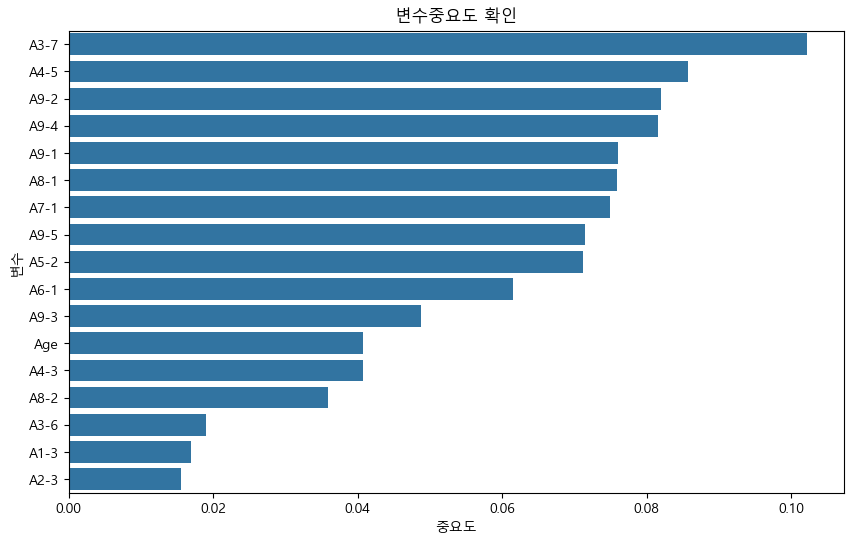

In [38]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_a_model.feature_importances_, index = X_train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


In [39]:
feature_importance

A3-7    0.102189
A4-5    0.085798
A9-2    0.082018
A9-4    0.081617
A9-1    0.076009
A8-1    0.075835
A7-1    0.074897
A9-5    0.071472
A5-2    0.071258
A6-1    0.061444
A9-3    0.048706
Age     0.040743
A4-3    0.040702
A8-2    0.035837
A3-6    0.019051
A1-3    0.016936
A2-3    0.015489
dtype: float64

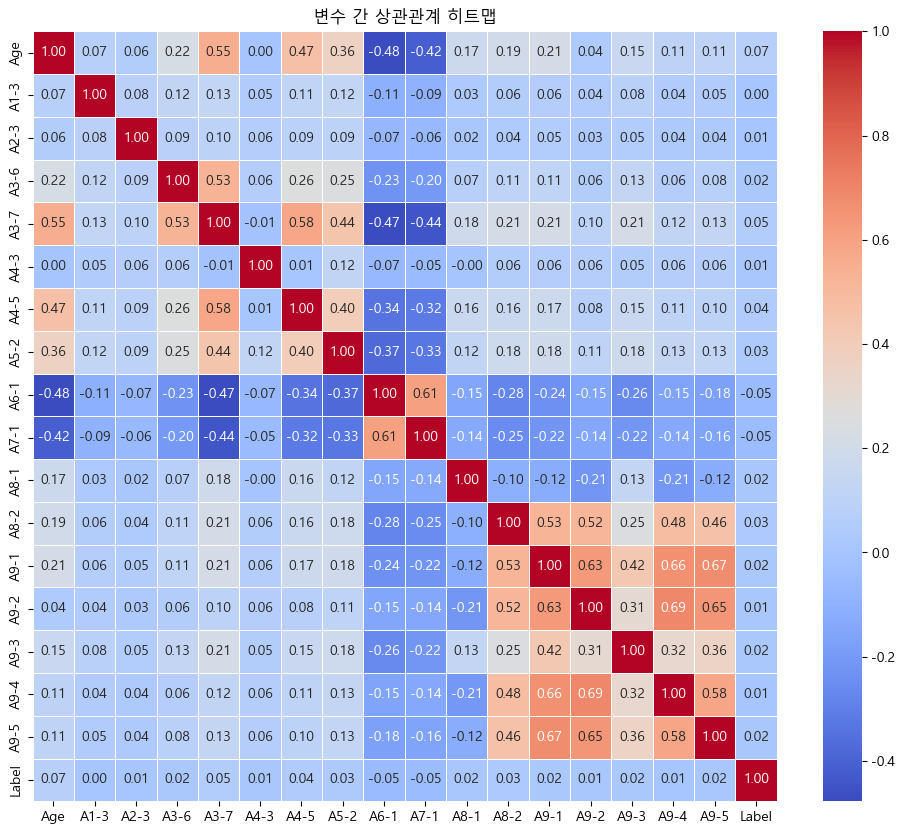

In [40]:
# 상관관계 확인
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5', 'Label']
corr_matrix = train_a_set[column].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()


In [41]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = train_a_set[column].select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,feature,VIF
6,A4-5,67.508523
4,A3-7,42.375935
0,Age,26.720384
8,A6-1,19.849710
9,A7-1,15.060327
13,A9-2,7.354342
7,A5-2,6.853604
12,A9-1,6.082420
15,A9-4,5.859456
16,A9-5,4.736142


#### (2) B자격검사

In [42]:
train_b_set['Age'] = train_b_set['Age'].apply(convert_age_to_numeric)

In [43]:
# 분석에 불필요한 변수 제거
X_train_df = train_b_set[['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
                          'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']]
y_train_df = train_b_set['Label']

In [44]:
# RandomForest를 활용한 특성 중요도 확인
rf_b_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_b_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

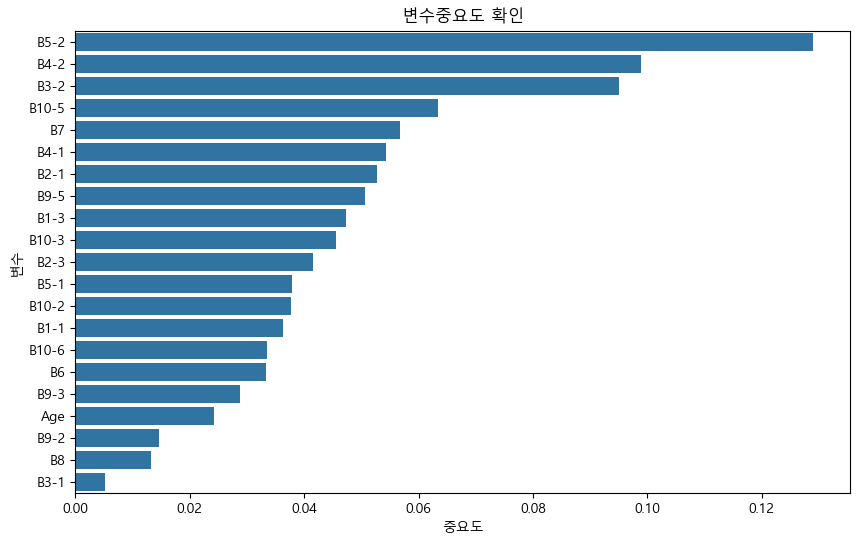

In [45]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_b_model.feature_importances_, index = X_train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


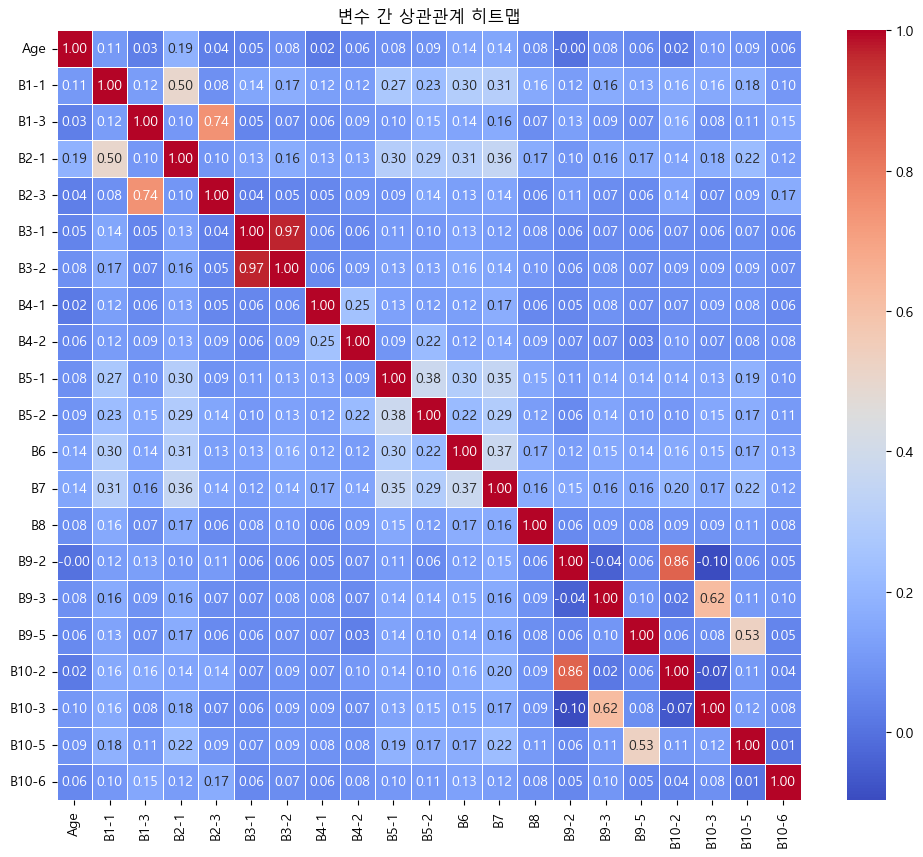

In [46]:
# 상관관계 확인
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
            'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
corr_matrix = train_b_set[column].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [47]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = train_b_set[column].select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,feature,VIF
6,B3-2,53.277476
0,Age,52.317284
8,B4-2,22.828225
4,B2-3,20.167842
2,B1-3,19.294030
5,B3-1,16.988942
10,B5-2,16.380193
17,B10-2,5.185054
14,B9-2,4.305469
12,B7,4.051074


### 마) 로지스틱 Test

#### (1) Test1
- 가장 기본적인 테스트 수행결과 : 0, 1의 데이터 불균형으로 정확도는 97%이나 1에대해 전혀 예측을 못하는 모델

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline


In [84]:
# A(신규자격) 로지스틱 회귀분석(base model)
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [86]:
np.unique(y_train, return_counts=True)
# 0에 비해 1의 데이터가 터무니 없이 부족(데이터 불균형)

(array([0, 1], dtype=int64), array([442782,  10284], dtype=int64))

In [87]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 1.0, solver='saga', max_iter=1000, penalty='l2', random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")


Accuracy : 0.9773
confusion_matrix : 
 [[189764      0]
 [  4408      0]]
classification_report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    189764
           1       0.00      0.00      0.00      4408

    accuracy                           0.98    194172
   macro avg       0.49      0.50      0.49    194172
weighted avg       0.96      0.98      0.97    194172

roc_auc_score : 0.6564


c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Test2
- class_weight='balanced' 적용으로 1을 예측하기는 시작했지만, 기준이 낮아지면서 0도 1로 예측하는 비율이 많아짐

In [88]:
# class_weight 파라미터 사용

# A(신규자격)
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습(class_weight)
logic_model = LogisticRegression(C = 1.0, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 class_weight='balanced',
                                 random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")

Accuracy : 0.6013
confusion_matrix : 
 [[113921  75843]
 [  1565   2843]]
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    189764
           1       0.04      0.64      0.07      4408

    accuracy                           0.60    194172
   macro avg       0.51      0.62      0.41    194172
weighted avg       0.96      0.60      0.73    194172

roc_auc_score : 0.6548


#### Test3
- 

In [89]:
# 필요한 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
# imbalanced-learn 라이브러리 설치가 필요할 수 있습니다: pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

In [93]:
# A(신규자격)
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 0.01, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 random_state=42,
                                 n_jobs=-1) # Added n_jobs for faster training
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

Accuracy : 0.6003
Confusion Matrix : 
 [[113692  76072]
 [  1544   2864]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    189764
           1       0.04      0.65      0.07      4408

    accuracy                           0.60    194172
   macro avg       0.51      0.62      0.41    194172
weighted avg       0.97      0.60      0.73    194172

ROC AUC Score : 0.6551
